<a href="https://colab.research.google.com/github/SantiagoMB21/analisis-exploratorio/blob/main/TrabajoFinalAEDv1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Final AED**
Santiago Muñoz Bolaños y
Juan David García

# **Librerías a utilizar**

In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/Análisis exploratorio de datos/DatosLEYE-finales.csv'
data = pd.read_csv(file_path)

# **Pregunta SMART**
¿Existe una correlación fuerte (>0.5) entre el número de individuos detectados de el Patiamarillo chico (Tringa flavipes) en el Valle Geográfico del Río Cauca y las condiciones ambientales (precipiación diaria y mensual, temperatura promedio y cobertura de agua) registradas durante el período de migración en los últimos 25 años según los datos de eBird?

# **Contexto**
En el Valle Geográfico del Río Cauca, la conservación de una de las especies de aves migratorias mas amenazadas como el Patiamarillo Chico (Tringa flavipes) se ha visto afectada por la falta de conocimiento sobre cómo las condiciones ambientales influyen en la migración y avistamientos de la especie. Las organizaciones ambientales locales no han podido establecer una relación clara entre las variaciones en temperatura y precipitación y los patrones de avistamientos de esta ave, lo que limita la toma de decisiones informadas para su conservación durante el periodo de migración.**bold text**

# **Dominio de los datos:**
1.   **Datos de eBird:** Pertecen a una base de datos mundial de datos de ciencia ciudadana, que son de uso público y pueden descargarse desde el sitio web de la organización.
2.   **Datos de precipitación diaria y mensual:** Fueron obtenido de Google Earth Engine, a partir de las coordenadas y fechas de cada uno de los registros de eBird.
3. **Datos de temperatura:** Fueron obtenido de Google Earth Engine, a partir de las coordenadas y fechas de cada uno de los registros de eBird.
4. **Datos de cobertura de agua:** Se calculó un buffer de 500m a partir del punto donde se realizó el registro y se obtuvo la proporción de cobertura de agua en Google Earth Engine.


# **Descripción de los campos**
1. GLOBAL.UNIQUE.IDENTIFIER: Corresponde a un código único asignado a cada uno de los avistamientos reportados en eBird
2. OBSERVATION.COUNT: correponde al número de individuos del Patiamarillo Chico reportados en cada registro
3. LATITUDE: Latitud
4. LONGITUDE: Longuitud
5. OBSERVATION.DATE: Fecha del registro
6. PROTOCOL.TYPE: Tipo de avistamiento registrado
7. DAILY.PRECIPITATION: Precipitación diaria en mm para la fecha del registro
8. MONTHLY.PRECIPITATION: Precipitación acumulada del mes del registro
9. MONTHLY.TEMPERATURE: Temperatura promedio mensual del mes del registro
10. COBERTURA.AGUA: proporción de cobertura de agua en un buffer de 500m a partir del punto del registro

# **Estructura de los datos**


In [82]:
# Resumen de la estructura del DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   GLOBAL.UNIQUE.IDENTIFIER            2958 non-null   object  
 1   OBSERVATION.COUNT                   2958 non-null   int64   
 2   LATITUDE                            2958 non-null   float64 
 3   LONGITUDE                           2958 non-null   float64 
 4   OBSERVATION.DATE                    2958 non-null   object  
 5   PROTOCOL.TYPE                       2958 non-null   object  
 6   DAILY.PRECIPITATION                 2958 non-null   float64 
 7   MONTHLY.PRECIPITATION               2958 non-null   float64 
 8   MONTLY.TEMPERATURE                  2958 non-null   float64 
 9   COBERTURA.AGUA                      2673 non-null   float64 
 10  OBSERVATION.COUNT.CATEGORY          2958 non-null   category
 11  OBSERVATION.COUNT.CATEGORY_ENC

In [83]:
# Dimensiones del DataFrame (filas, columnas)
print(f"Dimensiones del DataFrame: {data.shape}")

Dimensiones del DataFrame: (2958, 12)


In [84]:
# Estadísticas descriptivas
print(data.describe())

       OBSERVATION.COUNT     LATITUDE    LONGITUDE  DAILY.PRECIPITATION  \
count        2958.000000  2958.000000  2958.000000          2958.000000   
mean            4.821163     4.152455   -76.142378             5.821501   
std            12.936885     0.834408     0.514063            11.767721   
min             1.000000     2.611840   -77.490860             0.000000   
25%             1.000000     3.626733   -76.397705             0.000000   
50%             2.000000     3.881371   -76.350898             0.000000   
75%             4.000000     4.764559   -75.618489             7.675361   
max           200.000000     6.984203   -75.001629           122.390595   

       MONTHLY.PRECIPITATION  MONTLY.TEMPERATURE  COBERTURA.AGUA  
count            2958.000000         2958.000000     2673.000000  
mean              154.275512           19.779061        0.397707  
std               110.138449            2.333235        0.222473  
min                12.312138            7.399026        

In [85]:
# Suma de valores nulos por columna
print(data.isnull().sum())

GLOBAL.UNIQUE.IDENTIFIER                0
OBSERVATION.COUNT                       0
LATITUDE                                0
LONGITUDE                               0
OBSERVATION.DATE                        0
PROTOCOL.TYPE                           0
DAILY.PRECIPITATION                     0
MONTHLY.PRECIPITATION                   0
MONTLY.TEMPERATURE                      0
COBERTURA.AGUA                        285
OBSERVATION.COUNT.CATEGORY              0
OBSERVATION.COUNT.CATEGORY_ENCODED      0
dtype: int64


In [86]:
# Primeras 5 filas del DataFrame
print(data.head())

  GLOBAL.UNIQUE.IDENTIFIER  OBSERVATION.COUNT  LATITUDE  LONGITUDE  \
0       EBIRD:OBS409764406                  1  6.405548 -75.424361   
1       EBIRD:OBS666054430                  2  6.984203 -75.112168   
2      EBIRD:OBS1227922401                  1  6.969255 -75.129226   
3       EBIRD:OBS286564168                  1  6.148342 -75.375985   
4       EBIRD:OBS372036947                  4  6.110034 -75.417152   

  OBSERVATION.DATE PROTOCOL.TYPE  DAILY.PRECIPITATION  MONTHLY.PRECIPITATION  \
0       11/17/2001    Historical            20.287292             201.623348   
1        1/22/2011     Traveling             0.000000              79.723187   
2        3/25/2012    Historical            15.229471             357.375404   
3        9/21/2014          Area             5.510858             215.989918   
4         1/2/2016    Stationary             0.000000              59.990550   

   MONTLY.TEMPERATURE  COBERTURA.AGUA OBSERVATION.COUNT.CATEGORY  \
0           15.578088        0

In [87]:
# Últimas 5 filas del DataFrame
print(data.tail())

     GLOBAL.UNIQUE.IDENTIFIER  OBSERVATION.COUNT  LATITUDE  LONGITUDE  \
2953      EBIRD:OBS2020830107                  1  3.890721 -76.344287   
2954      EBIRD:OBS2028428895                  1  3.890721 -76.344287   
2955      EBIRD:OBS2307774620                  3  3.500485 -76.349337   
2956      EBIRD:OBS2348395101                  2  3.771217 -77.169880   
2957      EBIRD:OBS2314030696                  1  3.500485 -76.349337   

     OBSERVATION.DATE PROTOCOL.TYPE  DAILY.PRECIPITATION  \
2953         4/1/2024     Traveling             0.000000   
2954         4/1/2024     Traveling             0.000000   
2955        4/12/2024     Traveling             0.567761   
2956        7/17/2024     Traveling            27.996582   
2957        7/13/2024     Traveling             0.000000   

      MONTHLY.PRECIPITATION  MONTLY.TEMPERATURE  COBERTURA.AGUA  \
2953             174.932730           19.104590        0.287349   
2954             174.932730           19.104590        0.287349   

In [88]:
# Tipos de datos de cada columna del df
print(data.dtypes)

GLOBAL.UNIQUE.IDENTIFIER                object
OBSERVATION.COUNT                        int64
LATITUDE                               float64
LONGITUDE                              float64
OBSERVATION.DATE                        object
PROTOCOL.TYPE                           object
DAILY.PRECIPITATION                    float64
MONTHLY.PRECIPITATION                  float64
MONTLY.TEMPERATURE                     float64
COBERTURA.AGUA                         float64
OBSERVATION.COUNT.CATEGORY            category
OBSERVATION.COUNT.CATEGORY_ENCODED    category
dtype: object


In [89]:
list(data.columns)

['GLOBAL.UNIQUE.IDENTIFIER',
 'OBSERVATION.COUNT',
 'LATITUDE',
 'LONGITUDE',
 'OBSERVATION.DATE',
 'PROTOCOL.TYPE',
 'DAILY.PRECIPITATION',
 'MONTHLY.PRECIPITATION',
 'MONTLY.TEMPERATURE',
 'COBERTURA.AGUA',
 'OBSERVATION.COUNT.CATEGORY',
 'OBSERVATION.COUNT.CATEGORY_ENCODED']

Resumen de la sección: El DataFrame tiene 2958 registros y 12 columnas. Las columnas incluyen variables como el número de individuos observados, la latitud y longitud de las observaciones, y condiciones ambientales como la precipitación y la temperatura mensual. Notamos que la columna COBERTURA.AGUA tiene 285 valores faltantes, lo que implica que será necesario aplicar técnicas de imputación. Las estadísticas descriptivas muestran que el número de individuos observados varía considerablemente, con un valor máximo de 200 individuos. La mayoría de las observaciones se realizan en condiciones climáticas moderadas, como lo indican los valores promedio de precipitación diaria y temperatura mensual. Estos datos nos preparan para realizar el preprocesamiento necesario antes de entrenar el modelo.

# **Manejo de los datos**

Lo primero que hacemos es enfoncarnos en al variable objetivo, que tiene muchas clases.

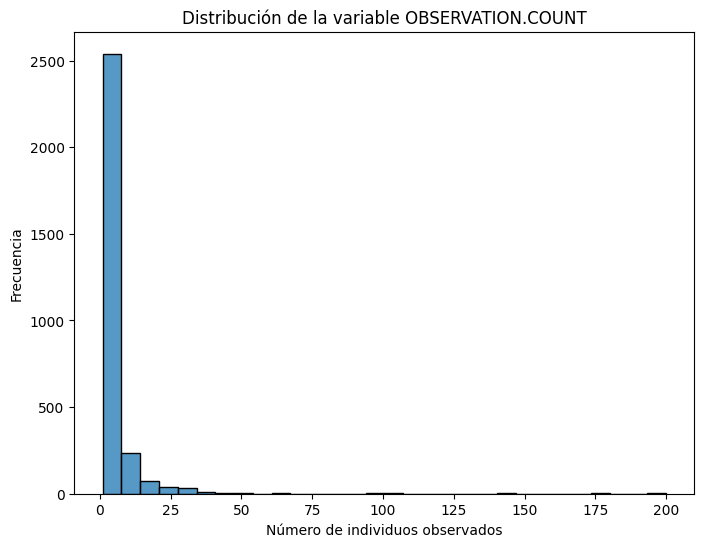

In [53]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear histograma
sns.histplot(data['OBSERVATION.COUNT'], bins=30, kde=False)

# Agregar títulos y etiquetas
plt.title('Distribución de la variable OBSERVATION.COUNT')
plt.xlabel('Número de individuos observados')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Como tenemos tantas clases en nuestra variable objetivo, vamos a agrupar esa variable OBSERVATION.COUNT en dos categorías, de 1 a 4 individuos (donde se encuentra el 78,29% de los registros) y 5 o más individuos registrados (21,71% de los registros). Para después hacer una codificación tipo "Label enconding" de esa variable.


In [54]:
#Categorizar 'OBSERVATION.COUNT'
data['OBSERVATION.COUNT.CATEGORY'] = pd.cut(data['OBSERVATION.COUNT'],
                                            bins=[0, 4, float('inf')],
                                            labels=['1-4', '5 o más'])

In [55]:
#Codificar la columna categorizada usando 1 y 2
data['OBSERVATION.COUNT.CATEGORY_ENCODED'] = data['OBSERVATION.COUNT.CATEGORY'].map({'1-4': 1, '5 o más': 2})


Visualizar la variable codificada

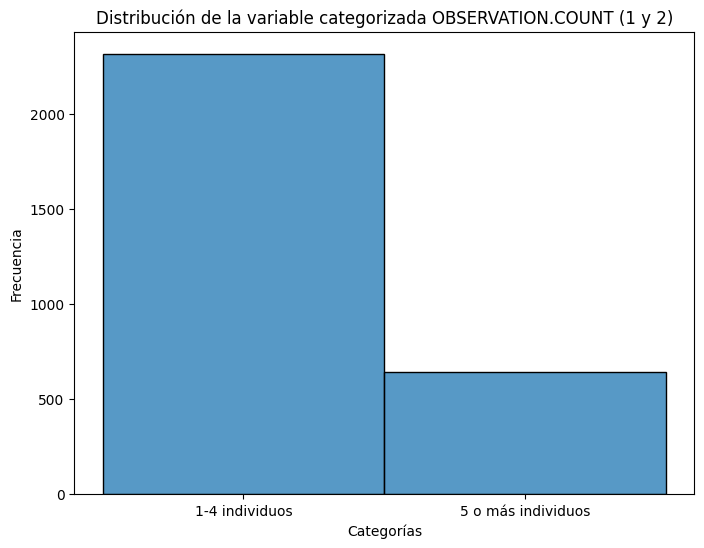

In [56]:
plt.figure(figsize=(8, 6))

# Crear el histograma de la variable categorizada
sns.histplot(data['OBSERVATION.COUNT.CATEGORY_ENCODED'], bins=2, kde=False)

# Ajustar las etiquetas del eje X
plt.xticks([1, 2], ['1-4 individuos', '5 o más individuos'])

# Agregar títulos y etiquetas
plt.title('Distribución de la variable categorizada OBSERVATION.COUNT (1 y 2)')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

**Resumen de la sección: ** En esta sección, comenzamos enfocándonos en la variable objetivo: el número de individuos observados (OBSERVATION.COUNT). Dado que esta variable tiene muchas clases, decidimos agruparla en dos categorías más manejables: "1-4 individuos" y "5 o más individuos", que representan el 78.29% y el 21.71% de los registros, respectivamente. Posteriormente, codificamos estas categorías en valores numéricos (1 y 2) para facilitar el modelado.

# **División datos Entrenamiento (80%) y Prueba (20%)**

In [57]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['DAILY.PRECIPITATION', 'MONTHLY.PRECIPITATION', 'MONTLY.TEMPERATURE', 'COBERTURA.AGUA']]
y = data['OBSERVATION.COUNT.CATEGORY_ENCODED']  # Variable objetivo categorizada y codificada

In [58]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (2366, 4)
Tamaño del conjunto de prueba: (592, 4)


**Resumen de la sección:** En esta sección, realizamos la división de los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se reserva para evaluar el rendimiento del modelo en datos no vistos. Utilizamos un 80% de los datos para entrenamiento y el 20% restante para prueba, asegurando que ambos conjuntos representen adecuadamente las características de los datos originales.

# **Preparación y Limpieza de datos (Entrenamiento)**

**Manejo de outliers**

Creamos un transformer personalizado OutlierHandler para manejar los outliers usando el IQR.

In [60]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # X vendrá como un array de NumPy, así que calculamos los cuantiles directamente
        self.Q1 = np.percentile(X, 25, axis=0)  # Cuartil 1
        self.Q3 = np.percentile(X, 75, axis=0)  # Cuartil 3
        self.IQR = self.Q3 - self.Q1  # Rango intercuartil
        self.lower_bound = self.Q1 - 1.5 * self.IQR  # Límite inferior
        self.upper_bound = self.Q3 + 1.5 * self.IQR  # Límite superior
        return self

    def transform(self, X):
        # Aplicar la transformación de outliers usando los límites calculados
        X_outliers = np.clip(X, self.lower_bound, self.upper_bound)  # Limitar a los valores del IQR
        return X_outliers


**Resumen de la sección:** Durante el proceso de preparación de los datos de entrenamiento, se manejaron los outliers mediante el método del IQR (Interquartile Range), que identifica valores fuera del rango intercuartil en las variables predictoras (precipitación diaria y mensual, temperatura, y cobertura de agua). Los valores que se encontraban por debajo o por encima de los límites se ajustaron a los valores límites correspondientes, lo que nos asegura que los outliers no afecten de manera desproporcionada el rendimiento del modelo. Este paso es crucial para mejorar la calidad de los datos y evitar que valores extremos interfieran en el entrenamiento del modelo.

# Pipeline de manejo de datos

In [61]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputar los valores faltantes con la mediana
    ('outlier_handler', OutlierHandler()),          # Manejar los outliers
    ('scaler', StandardScaler())                   # Estandarizar las variables
])

**Resúmen de la sección:** El pipeline de preprocesamiento incluye tres pasos clave. Primero, utilizamos SimpleImputer para reemplazar los valores faltantes en las variables predictoras con la mediana. Luego, aplicamos el transformer personalizado OutlierHandler para ajustar los valores atípicos utilizando el método del IQR, asegurándonos de que los outliers no afecten negativamente al modelo. Finalmente, utilizamos StandardScaler para estandarizar las variables, lo que garantiza que todas las características estén en la misma escala, un paso importante cuando se trabaja con modelos que son sensibles a la magnitud de los datos.

# Aplicamos el pipeline a los datos de entrenamiento

In [62]:
X_train_processed = pipeline.fit_transform(X_train)

In [63]:
# Aplicar el Pipeline a los datos de prueba (sin recalcular los parámetros)
X_test_processed = pipeline.transform(X_test)

In [64]:
# Convertir el resultado en un DataFrame para una visualización más clara
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X.columns)
# Mostrar las primeras filas de los datos procesados
print(X_train_processed_df.head())

   DAILY.PRECIPITATION  MONTHLY.PRECIPITATION  MONTLY.TEMPERATURE  \
0            -0.630392              -0.642086           -0.515868   
1            -0.630392              -1.133704           -0.922867   
2            -0.369161              -0.342361            0.167691   
3            -0.137627               0.205085            0.658449   
4            -0.630392               0.299831           -0.311536   

   COBERTURA.AGUA  
0       -0.295758  
1        0.843403  
2       -0.295758  
3        0.876405  
4       -0.498857  


In [65]:
# Revisar si hay valores NA en los datos procesados
na_values = X_train_processed_df.isna().sum()

# Mostrar las columnas con valores NA (si los hay)
print("Valores NA por columna:")
print(na_values[na_values > 0])

# Si no hay valores NA, te mostrará un mensaje:
if na_values.sum() == 0:
    print("No hay valores NA en los datos procesados.")

Valores NA por columna:
Series([], dtype: int64)
No hay valores NA en los datos procesados.


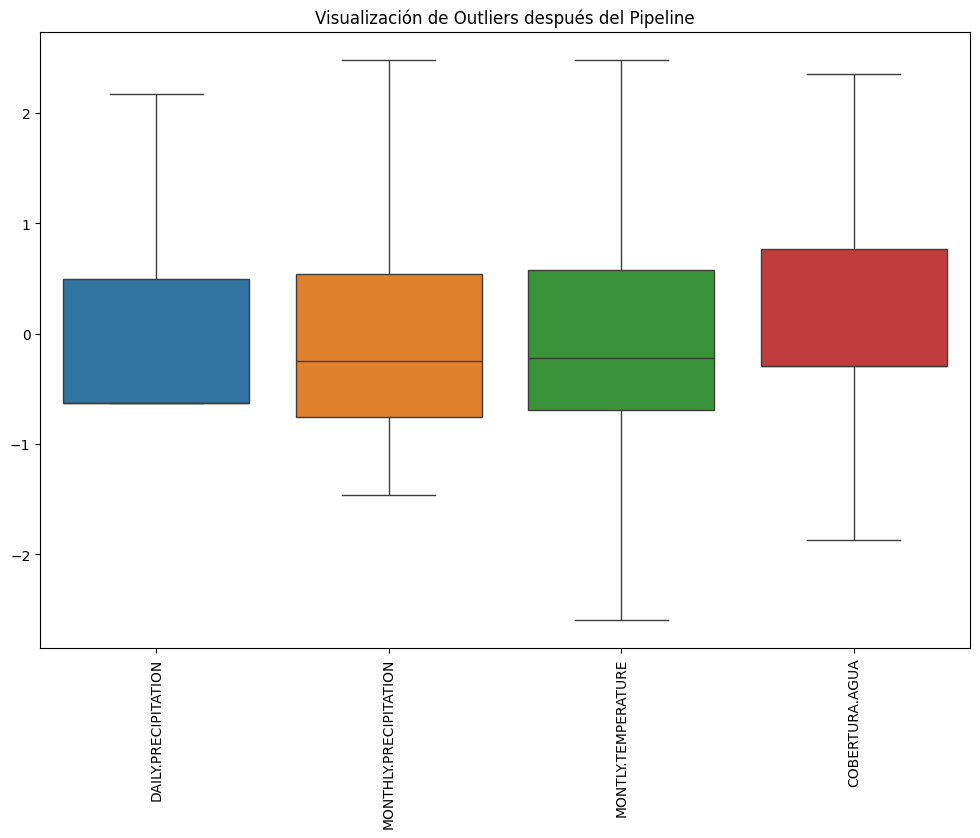

In [66]:
# Crear un boxplot para visualizar los outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_processed_df)
plt.title('Visualización de Outliers después del Pipeline')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()

**Resúmen de la sección:** Después de aplicar el pipeline de preprocesamiento a los datos de entrenamiento, confirmamos que no hay valores faltantes en las variables predictoras. Además, el boxplot generado nos muestra cómo los outliers han sido manejados adecuadamente. Las variables como precipitación diaria, mensual, temperatura y cobertura de agua muestran una distribución más controlada, dentro de rangos razonables, sin presencia de valores extremos que puedan sesgar el modelo. Al estandarizar las variables, todas están dentro de una misma escala, lo que es crucial para que los algoritmos de aprendizaje automático funcionen de manera óptima. Este paso garantiza que los datos están en la mejor forma posible para entrenar el modelo.

# **Modelo**

Random Forest

In [71]:
#Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [72]:
# Entrenar el modelo con los datos preprocesados
rf_model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [92]:
#Hacer predicciones y evaluar el modelo**
y_pred_rf = rf_model.predict(X_test_processed)

# Calcular las métricas de evaluación
print("Matriz de Confusión para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

Matriz de Confusión para Random Forest:
[[431  28]
 [ 36  97]]

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       459
           2       0.78      0.73      0.75       133

    accuracy                           0.89       592
   macro avg       0.85      0.83      0.84       592
weighted avg       0.89      0.89      0.89       592



In [91]:
#Imprimir la eficacia del modelo
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Eficacia del modelo (accuracy): {accuracy:.2f}")

Eficacia del modelo (accuracy): 0.89


**Resúmen de la sección:** El Random Forest mostró un excelente rendimiento con una precisión global (accuracy) del 89%. Al analizar los resultados, el modelo predice correctamente la mayoría de las observaciones, con una precisión del 92% y un recall del 94% para la clase 1 (1-4 individuos). Para la clase 2 (5 o más individuos), el modelo tiene una precisión del 78% y un recall del 73%, lo que indica que, aunque hay un ligero desbalance en el rendimiento entre ambas clases, el modelo logra capturar bien los patrones de ambas categorías. El macro promedio de precisión y recall es de 0.85 y 0.83, respectivamente, lo que refuerza el buen rendimiento general del modelo. La matriz de confusión muestra que el modelo realizó 431 predicciones correctas para la clase 1 y 97 para la clase 2, con algunos errores de clasificación, lo que es esperable en un escenario con clases desbalanceadas.

# **Interpretación de los resultados**
Los resultados del modelo Random Forest muestran una correlación moderada entre las condiciones climáticas y el número de individuos de Tringa flavipes avistados en el Valle Geográfico del Río Cauca. El modelo predice con alta precisión las observaciones de 1 a 4 individuos, lo que sugiere que las variables como la precipitación diaria y la temperatura mensual tienen una influencia clara cuando los avistamientos son de grupos pequeños. Sin embargo, la precisión disminuye al predecir la clase de 5 o más individuos avistados, lo que indica que, aunque las condiciones climáticas juegan un papel importante, existen otros factores ecológicos, como la disponibilidad de alimento o la perturbación del hábitat, que podrían influir en la presencia de grupos más grandes de *Tringa flavipes*. Esto sugiere que las condiciones ambientales no son el único factor determinante en los grandes avistamientos y que un análisis más completo debería incluir variables adicionales para mejorar la comprensión de los factores que afectan la migración de esta especie.